<a href="https://colab.research.google.com/github/Patternic10/CSCI-4170-Project-in-AI-ML/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

khhbh

In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving diabetes_012.csv to diabetes_012.csv


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('diabetes_012.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Check for missing values
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
# Check for duplicates
print(df.duplicated().sum())

23899


In [5]:
# Summary statistics
print(df.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [3]:
from sklearn.preprocessing import StandardScaler
# Separate features and target
X = df.drop("Diabetes_012", axis=1)  # Features
y = df["Diabetes_012"]  # Target

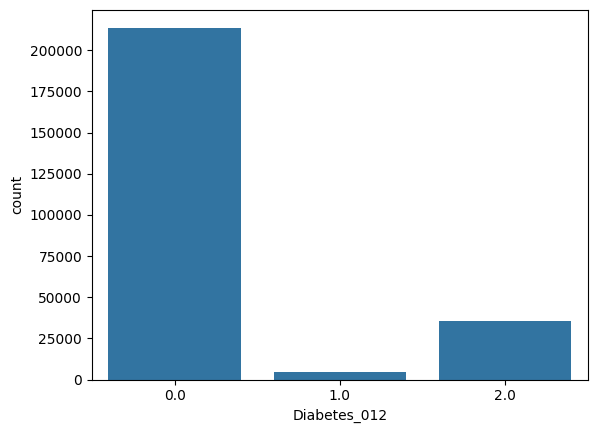

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Diabetes_012'])
plt.show()

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Diabetes_012'])], axis=1)

# Apply StandardScaler after SMOTE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [8]:
# Enable GPU
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """Initialize weights and biases."""
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Weight initialization (random values)
        self.W1 = np.random.randn(self.hidden_size, self.input_size) * 0.01
        self.b1 = np.zeros((self.hidden_size, 1))
        self.W2 = np.random.randn(self.output_size, self.hidden_size) * 0.01
        self.b2 = np.zeros((self.output_size, 1))

    def softmax(self, Z):
        """Softmax activation function for multi-class classification."""
        exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stability improvement
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

    def forward_propagation(self, X):
        """Compute forward propagation."""
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = 1 / (1 + np.exp(-self.Z1))  # Sigmoid activation for hidden layer
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.softmax(self.Z2)  # Softmax activation for multi-class output
        return self.A2

    def compute_cost(self, Y_hat, Y):
        """Compute categorical cross-entropy loss."""
        m = Y.shape[1]
        cost = -np.sum(Y * np.log(Y_hat + 1e-9)) / m  # Adding small value for numerical stability
        return np.squeeze(cost)

    def backward_propagation(self, X, Y):
        """Compute gradients for backpropagation."""
        m = X.shape[1]

        # Gradients for output layer
        dZ2 = self.A2 - Y
        dW2 = np.dot(dZ2, self.A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        # Gradients for hidden layer
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * (self.A1 * (1 - self.A1))  # Sigmoid derivative
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        # Update weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, Y, epochs=1000):
        """Train the neural network using gradient descent."""
        for epoch in range(epochs):
            Y_hat = self.forward_propagation(X)
            cost = self.compute_cost(Y_hat, Y)
            self.backward_propagation(X, Y)

            if epoch % 500 == 0:
                print(f"Epoch {epoch}: Cost = {cost:.4f}")

    def predict(self, X):
        """Make predictions on new data."""
        Y_hat = self.forward_propagation(X)
        return np.argmax(Y_hat, axis=0)  # Select the class with the highest probability


In [6]:
from sklearn.preprocessing import OneHotEncoder

# Reshape y_resampled to be 2D (necessary for one-hot encoding)
y_resampled = y_resampled.values.reshape(-1, 1)

# Apply one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y_resampled)

# Transpose for neural network (expected shape: (output_size, num_samples))
y_onehot = y_onehot.T

# Convert X_scaled to correct shape (features, samples)
X_scaled = X_scaled.T


In [7]:
# Define network structure
input_size = X_scaled.shape[0]  # Number of features
hidden_size = 10  # You can tune this
output_size = 3  # Three classes: 0, 1, 2


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled.T, y_onehot.T, test_size=0.2, random_state=42)

In [15]:
# Train the neural network on the training set
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.01)
nn.train(X_train.T, y_train.T, epochs=5000)

# Make predictions on the test set
predictions = nn.predict(X_test.T)

# Evaluate the model on the test set
print("Predicted labels:", predictions)


Epoch 0: Cost = 1.0987
Epoch 500: Cost = 1.0985
Epoch 1000: Cost = 1.0982
Epoch 1500: Cost = 1.0973
Epoch 2000: Cost = 1.0944
Epoch 2500: Cost = 1.0856
Epoch 3000: Cost = 1.0647
Epoch 3500: Cost = 1.0318
Epoch 4000: Cost = 1.0004
Epoch 4500: Cost = 0.9798
Predicted labels: [2 1 1 ... 0 2 2]


21

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """Initialize weights and biases."""
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Weight initialization (random values)
        self.W1 = np.random.randn(self.hidden_size, self.input_size) * 0.01
        self.b1 = np.zeros((self.hidden_size, 1))
        self.W2 = np.random.randn(self.output_size, self.hidden_size) * 0.01
        self.b2 = np.zeros((self.output_size, 1))

    def softmax(self, Z):
        """Softmax activation function for multi-class classification."""
        exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stability improvement
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

    def forward_propagation(self, X):
        """Compute forward propagation."""
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = 1 / (1 + np.exp(-self.Z1))  # Sigmoid activation for hidden layer
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.softmax(self.Z2)  # Softmax activation for multi-class output
        return self.A2

    def compute_cost(self, Y_hat, Y):
        """Compute categorical cross-entropy loss."""
        m = Y.shape[1]
        cost = -np.sum(Y * np.log(Y_hat + 1e-9)) / m  # Adding small value for numerical stability
        return np.squeeze(cost)

    def backward_propagation(self, X, Y):
        """Compute gradients for backpropagation."""
        m = X.shape[1]

        # Gradients for output layer
        dZ2 = self.A2 - Y
        dW2 = np.dot(dZ2, self.A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        # Gradients for hidden layer
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * (self.A1 * (1 - self.A1))  # Sigmoid derivative
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        # Update weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, Y, epochs=1000, batch_size=32, shuffle=True):
        """Train the neural network using mini-batch gradient descent."""
        m = X.shape[1]
        for epoch in range(epochs):
            if shuffle:
                # Shuffle the data
                permutation = np.random.permutation(m)
                X_shuffled = X[:, permutation]
                Y_shuffled = Y[:, permutation]
            else:
                X_shuffled = X
                Y_shuffled = Y

            # Split into mini-batches
            num_batches = m // batch_size
            if m % batch_size != 0:
                num_batches += 1  # To account for the last smaller batch

            for i in range(num_batches):
                start = i * batch_size
                end = start + batch_size
                X_batch = X_shuffled[:, start:end]
                Y_batch = Y_shuffled[:, start:end]

                # Forward propagation
                self.forward_propagation(X_batch)

                # Backward propagation and parameter update
                self.backward_propagation(X_batch, Y_batch)

            # Print cost every 100 epochs
            if epoch % 500 == 0:
                Y_hat = self.forward_propagation(X)
                cost = self.compute_cost(Y_hat, Y)
                print(f"Epoch {epoch}: Cost = {cost:.4f}")

    def predict(self, X):
        """Make predictions on new data."""
        Y_hat = self.forward_propagation(X)
        return np.argmax(Y_hat, axis=0)

In [19]:
# Train the neural network on the training set
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.01)
nn.train(X_train.T, y_train.T, epochs=5000, batch_size=32, shuffle=True)

# Make predictions on the test set
predictions_new = nn.predict(X_test.T)

# Evaluate the model on the test set
print("Predicted labels:", predictions_new)

Epoch 0: Cost = 0.9473
Epoch 500: Cost = 0.9118
Epoch 1000: Cost = 0.9122
Epoch 1500: Cost = 0.9112
Epoch 2000: Cost = 0.9113
Epoch 2500: Cost = 0.9114
Epoch 3000: Cost = 0.9108
Epoch 3500: Cost = 0.9107
Epoch 4000: Cost = 0.9130
Epoch 4500: Cost = 0.9104
Predicted labels: [2 2 2 ... 0 2 2]


I used the batch and mini batch gradient descent as it seems both were faster than SGD which is weird. I also used 80% of the data for training. I also think the slowness of SGD is expected due to per-sample updates which are computationally inefficient on GPUs.

# Part 2
##Task 1
To learn a deep learning framework (e.g., PyTorch) for implementing a 2-layer neural network (NN), here are the key resources and tools I would use, along with their relevance:
Resource: Official Framework Documentation
PyTorch: https://pytorch.org/docs/stable/index.html
Why is it needed?
Core Concepts: Learn foundational components like tensors, automatic differentiation (autograd in PyTorch), and pre-built layers (nn.Linear).

Workflow: Understand how to define models, compute gradients, and update weights.
Neural Network-Specific Guides
Resource: Framework-Specific NN Tutorials
PyTorch: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

Community forums like stackoverflow are also helpful in this regard.

# Task 2

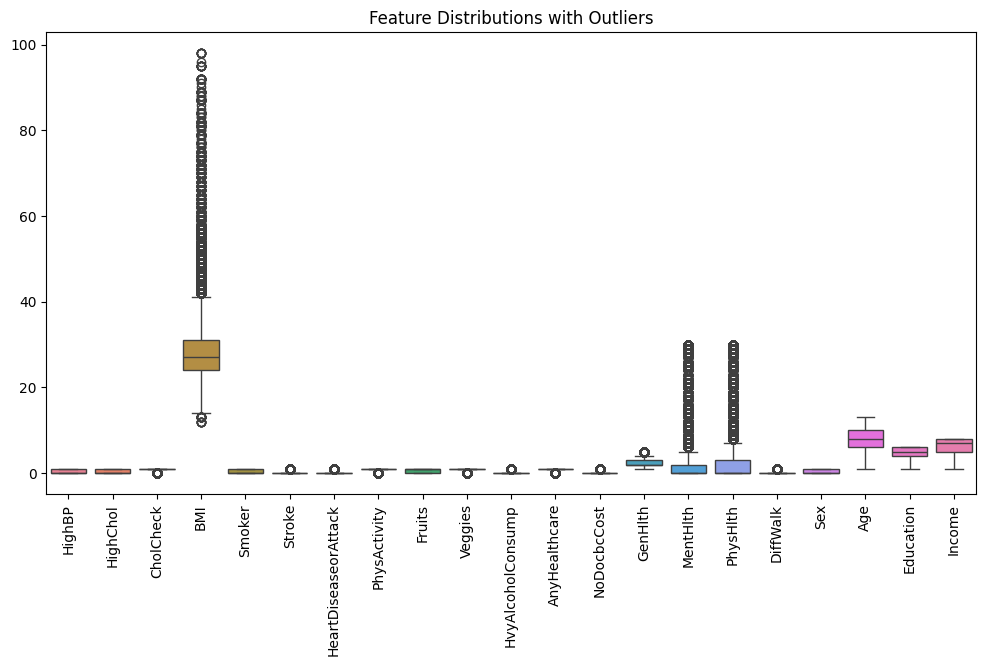

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(X)
plt.xticks(rotation=90)
plt.title("Feature Distributions with Outliers")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# Step 1: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled.T, y_onehot.T, test_size=0.2, random_state=42, stratify=y_onehot.T)

# Step 2: Further split the training set into Train (70%) and Dev (10%)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

# Print dataset sizes
print(f"Training set: {X_train.shape}, Validation set: {X_dev.shape}, Test set: {X_test.shape}")

# Step 3: Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_dev = torch.tensor(X_dev, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long)
y_dev = torch.tensor(np.argmax(y_dev, axis=1), dtype=torch.long)
y_test = torch.tensor(np.argmax(y_test,axis=1), dtype=torch.long)

# Step 4: Create DataLoaders
batch_size = 32  # Modify as needed
train_dataset = TensorDataset(X_train, y_train)
dev_dataset = TensorDataset(X_dev, y_dev)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Training set: (448776, 21), Validation set: (64111, 21), Test set: (128222, 21)


In [ ]:
import torch
import torch.nn as nn
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define optimized model
class TwoLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.layer1(x), negative_slope=0.01)
        x = self.layer2(x)
        return x

# Initialize model
hidden_dim = 16
model = TwoLayerNN(X_train.shape[1], hidden_dim, y_train.max().item() + 1).to(device)

# Xavier Initialization
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

model.apply(initialize_weights)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.5)

# Mixed precision training
scaler = torch.cuda.amp.GradScaler()

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        #inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()

    scheduler.step()

    # Evaluate on validation set every 100 epochs
    if (epoch + 1) % 100 == 0:
        model.eval()
        with torch.no_grad():
            dev_loss = 0
            correct, total = 0, 0
            for inputs, labels in dev_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                dev_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            dev_loss /= len(dev_loader)
            dev_acc = 100 * correct / total
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Dev Loss: {dev_loss:.4f}, Dev Acc: {dev_acc:.2f}%')

# Final Evaluation on Test Set
model.eval()
with torch.no_grad():
    correct, total = 0, 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_acc = 100 * correct / total
    print(f'Test Accuracy: {test_acc:.2f}%')


<ipython-input-11-ed148206e47d>:35: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
<ipython-input-11-ed148206e47d>:44: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch [100/1000], Train Loss: 1.1238, Dev Loss: 0.6982, Dev Acc: 66.06%
Epoch [200/1000], Train Loss: 0.9696, Dev Loss: 0.6800, Dev Acc: 66.83%
Epoch [300/1000], Train Loss: 0.8270, Dev Loss: 0.6912, Dev Acc: 66.50%
Epoch [400/1000], Train Loss: 0.6754, Dev Loss: 0.6692, Dev Acc: 67.02%
Epoch [500/1000], Train Loss: 0.9388, Dev Loss: 0.6671, Dev Acc: 67.72%
Epoch [600/1000], Train Loss: 0.7859, Dev Loss: 0.6580, Dev Acc: 67.71%
Epoch [700/1000], Train Loss: 0.6814, Dev Loss: 0.6498, Dev Acc: 68.15%


In [21]:
# Save the trained model
torch.save(model.state_dict(), "two_layer_nn.pth")
print("Model saved successfully!")

Model saved successfully!


In [22]:
!pip install torch optuna tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
from torch.utils.tensorboard import SummaryWriter
import datetime

# Save TensorBoard logs to Google Drive (Optional)
log_dir = "/content/drive/My Drive/Colab_TensorBoard/" + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
writer = SummaryWriter(log_dir)

# Task 3

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import optuna
from torch.utils.tensorboard import SummaryWriter
import datetime



# Define Model
class TwoLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.layer1(x), negative_slope=0.01)
        x = self.layer2(x)
        return x

# Xavier Initialization
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

# Objective function for Optuna
def objective(trial):
    hidden_dim = trial.suggest_categorical("hidden_dim", [16, 32, 64])
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    dev_loader = DataLoader(TensorDataset(X_dev, y_dev), batch_size=batch_size)

    model = TwoLayerNN(X_train.shape[1], hidden_dim, y_train.max().item() + 1).to(device)
    model.apply(initialize_weights)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    log_dir = "/content/drive/My Drive/Colab_TensorBoard/" + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    writer = SummaryWriter(log_dir)

    num_epochs = 300
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)
        writer.add_scalar("Loss/Train", avg_train_loss, epoch)

        model.eval()
        correct, total = 0, 0
        dev_loss = 0
        with torch.no_grad():
            for inputs, labels in dev_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                dev_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_dev_loss = dev_loss / len(dev_loader)
        dev_acc = 100 * correct / total
        writer.add_scalar("Loss/Dev", avg_dev_loss, epoch)
        writer.add_scalar("Accuracy/Dev", dev_acc, epoch)

    writer.close()
    return dev_acc

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Print best hyperparameters
print(f"Best Hyperparameters: {study.best_params}, Accuracy={study.best_value:.2f}%")


[I 2025-02-11 13:17:47,783] A new study created in memory with name: no-name-97542941-8e31-4465-9696-ba0b95af3d34
<ipython-input-25-7695d3faa8db>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-1)
[I 2025-02-11 14:06:31,151] Trial 0 finished with value: 66.03390993745224 and parameters: {'hidden_dim': 16, 'lr': 0.04226459351666136, 'batch_size': 128}. Best is trial 0 with value: 66.03390993745224.
[I 2025-02-11 14:56:35,084] Trial 1 finished with value: 70.11433295378328 and parameters: {'hidden_dim': 64, 'lr': 0.0002535975445183812, 'batch_size': 128}. Best is trial 1 with value: 70.11433295378328.
[I 2025-02-11 16:08:24,410] Trial 2 finished with value: 70.37169908440049 and parameters: {'hidden_dim': 64, 'lr': 0.0006707430336502644, 'batch_size': 64}. Best is trial 2 with value:

Hyperparameter tuning was performed using Optuna, a framework designed for automated hyperparameter optimization. The key hyperparameters tuned included the hidden layer dimension (`hidden_dim`), learning rate (`lr`), and batch size (`batch_size`). These were selected because they significantly influence model performance: the hidden layer dimension affects the model's capacity to learn complex patterns, the learning rate controls the convergence speed and stability, and the batch size impacts both training efficiency and generalization. Optuna's trial-based approach allowed for an efficient search across a predefined range of values, balancing exploration and exploitation. Xavier initialization was used to ensure stable gradient flow during training. Regularization was not explicitly applied, as the primary focus was on optimizing the architecture and training dynamics. The Adam optimizer was employed due to its adaptive learning rate capabilities, which help in achieving faster convergence but still it took long to complete the epoch. The optimization process aimed to maximize validation accuracy, and the best hyperparameters were selected based on this criterion.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.T, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84     42740
         1.0       0.72      0.70      0.71     42741
         2.0       0.61      0.59      0.60     42741

    accuracy                           0.72    128222
   macro avg       0.71      0.72      0.72    128222
weighted avg       0.71      0.72      0.72    128222



When comparing the results of the Neural Network (NN) and the Random Forest (RF) baseline model, the RF model slightly outperforms the NN with a test accuracy of 72% compared to the NN's 70%. Some of the reasons I could think of are;

Neural Networks often require more data and longer training times to achieve optimal performance. Although the dataset is big enough, I don't think the epoch I trained with is enough as I could have trained for a much longer time. But this takes too much time to exceute.

Maybe the hyperparameters tuning were not done effectively.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.59      0.10      0.18      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.36      0.36     50736
weighted avg       0.80      0.85      0.80     50736



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
X.shape

(253680, 21)